In [102]:
# GEt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [103]:
# Import data
dataset = pd.read_csv('LinkedIn Profile Data.csv')
print(dataset.head())

  c_id  avg_time_in_previous_position  avg_current_position_length  \
0    1                       2.000000                        457.0   
1    2                       1.500000                        212.0   
2    3                       1.333333                        243.0   
3    4                       1.250000                        123.0   
4    5                       1.200000                        244.0   

   avg_previous_position_length  no_of_promotions  no_of_previous_positions  \
0                        1338.0                 1                         1   
1                         897.5                 1                         2   
2                         669.0                 1                         3   
3                         562.5                 1                         4   
4                         474.6                 1                         5   

   current_position_length  age  beauty  beauty_female  ...  east_asian  \
0                      457   

C:\Users\jhm\AppData\Local\Temp\ipykernel_17960\2998624788.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('LinkedIn Profile Data.csv')


In [104]:
# Extract the "ethnicity" column, the head_pitch, head_yaw, and head_roll columns
# and the "promoted" column

# Remove the last column from the dataset (we do not care about face quality)
faceq_column = dataset.columns.get_loc("face_quality")
dataset = dataset.iloc[:, :faceq_column]


# Remove the first column from the dataset (we do not care about the ID)
id_column = dataset.columns.get_loc("c_id")
dataset = dataset.iloc[:, id_column+1:]

# Remove the "nationality" column as it is already represented categorically by the next column
nationality_column = dataset.columns.get_loc("nationality")
dataset = dataset.drop(dataset.columns[nationality_column], axis=1)


# Find the column named "Glass"
glass_column = dataset.columns.get_loc("ethnicity")
# Print the unique values in the "Glass" column
print(dataset.iloc[:, glass_column].unique())


# print all column names
# print(dataset.columns)

# Encode the "ethnicity" column
encoded_df = pd.get_dummies(dataset['ethnicity'], prefix='ethnicity')
dataset = pd.concat([dataset, encoded_df], axis=1)
dataset.drop('ethnicity', axis=1, inplace=True)

# Encode the gender column
encoded_df = pd.get_dummies(dataset['gender'], prefix='gender')
dataset = pd.concat([dataset, encoded_df], axis=1)
dataset.drop('gender', axis=1, inplace=True)

# Encode the "glass" column
encoded_df = pd.get_dummies(dataset['glass'], prefix='glass')
dataset = pd.concat([dataset, encoded_df], axis=1)
dataset.drop('glass', axis=1, inplace=True)



n_followers_column = dataset.columns.get_loc("n_followers")
dataset = dataset[[c for c in dataset if c not in ['n_followers']] + ['n_followers']]

# Remove the rows with the top 10% of followers
dataset = dataset[dataset.n_followers < dataset.n_followers.quantile(0.9)]




['Asian' 'Black' 'White']


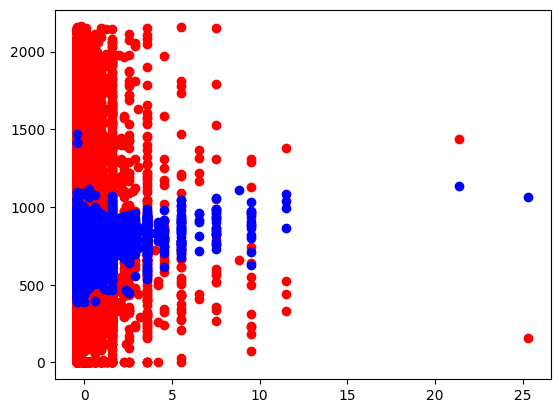

In [105]:
# Split to independent and dependent variables

X = dataset.iloc[:, :-1].to_numpy()
Y = dataset.iloc[:, -1].to_numpy()


# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Predict the test set results
Y_pred = regressor.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

# Visualize ethnicity X_test col vs followers (y_test) vs predicted followers (y_pred)
plt.scatter(X_test[:, 0], Y_test, color = 'red')
plt.scatter(X_test[:, 0], Y_pred, color = 'blue')

plt.show()


